In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Q1. Explain the assumptions required to use ANOVA and provide examples of violations that could impact the validity of the results.

### The assumptions required to use the statistical tool ANOVA are as follows:

1. Normality of the sampling distribution of means. [The distribution of the sample mean is normally distributed.]
2. Absence of outliers. [Outlying score should be removed from the dataset.]
3. Homegenity of variance. [Population variance in different levels of each independent sample are equal.]
4. Samples are independent and random.
5. Factor effects are additive.

### Impact of the violations of the above stated rules can cause in the production of an invalid ANOVA result:

1. **Nonnormality:** The inequality of the population variances can be assessed by examination of the relative size of the sample variances, either informally (including graphically), or by a robust variance test such as Levene's test. The effect of inequality of variances is mitigated when the sample sizes are equal: The F test is fairly robust against inequality of variances if the sample sizes are equal, although the chance increases of incorrectly reporting a significant difference in the means when none exists.

4. **Lack of independence:** Whether the samples are independent of each other is generally determined by the structure of the experiment from which they arise. Obviously correlated samples, such as a set of observations over time on the same subjects, are not independent, and such data would be more appropriately tested by a one-way blocked ANOVA or a repeated measures ANOVA. If you are unsure whether your samples are independent, you may wish to consult a statistician or someone who is knowledgeable about the data collection scheme you are using.:** The values in a sample may indeed be from the same population, but not from a normal one. Signs of nonnormality are skewness (lack of symmetry) or light-tailedness or heavy-tailedness. The boxplot, histogram, and normal probability plot (normal Q-Q plot), along with the normality test, can provide information on the normality the population distribution. The one-way ANOVA's F test will not be much affected even if the population distributions are skewed, but the F test can be sensitive to population skewness if the sample sizes are seriously unbalanced. If the sample sizes are not unbalanced, the F test will not be seriously affected by light-tailedness or heavy-tailedness

2. **Outliers Present:** Values may not be identically distributed because of the presence of outliers. Outliers are anomalous values in the data. Outliers tend to increase the estimate of sample variance, thus decreasing the calculated F statistic for the ANOVA and lowering the chance of rejecting the null hypothesis. The boxplot and normal probability plot (normal Q-Q plot) may suggest the presence of outliers in the data.

3. **Unequal population variances:** The inequality of the population variances can be assessed by examination of the relative size of the sample variances, either informally (including graphically), or by a robust variance test such as Levene's test. The effect of inequality of variances is mitigated when the sample sizes are equal: The F test is fairly robust against inequality of variances if the sample sizes are equal, although the chance increases of incorrectly reporting a significant difference in the means when none exists.

4. **Lack of independence:** Whether the samples are independent of each other is generally determined by the structure of the experiment from which they arise. Obviously correlated samples, such as a set of observations over time on the same subjects, are not independent, and such data would be more appropriately tested by a one-way blocked ANOVA or a repeated measures ANOVA. If we are unsure whether the samples are independent, you may wish to consult a statistician or someone who is knowledgeable about the data collection scheme you are using.

## Q2. What are the three types of ANOVA, and in what situations would each be used?

### The 3 types of ANOVA are as follows:

1. **One Way ANOVA:** One factor with atleast 2 levels and the levels are independent.

2. **Repeated Measures ANOVA:** One factor with atleast 2 levels and the levels are dependent.

3. **Factorial ANOVA:** Two or more factors and each of which having atleast 2 levels. The levels can be dependent or independent.

### The situations in which each of theabove stated types of ANOVA would be used are as foolows:

1. **One Way ANOVA:**  We have a group of individuals randomly split into smaller groups and completing different tasks. For example, you might be studying the effects of tea on weight loss and form three groups: green tea, black tea, and no tea as different levels and the factor is ***Effects of Tea***.

2. **Repeated Measures ANOVA:** We have a group of people and we are trying to measure the effect of running continuously for 5 days a week with the same participants. So in this case, ***Running*** will be the factor and ***Days of Running*** will be the different levels.

3. **Factorial ANOVA:** We have a group of people and we are trying to measure the effect of running continuously for a few days and we also want to understand the data based on gender. So in this case, ***Running*** and ***Gender*** are the 2 factors and the levels are ***Days of Running*** and ***Male*** and ***Female*** of the different factors respectively.

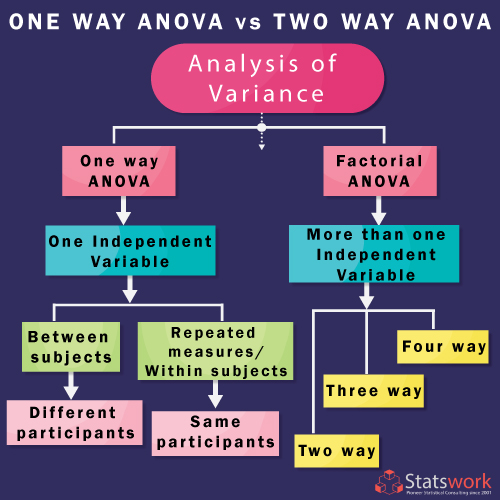

## Q3. What is the partitioning of variance in ANOVA, and why is it important to understand this concept?

An ANOVA uses an F-test to evaluate whether the variance between the groups is greater than the variance within a group. Another way to view this problem is that we could partition variance, that is, we could divide the total variance in our data into the various sources of that variation. Here, some of the variance results from variation among replicates within each group, and the rest comes from variation among the groups. Partitioning variance is an incredibly important concept within statistics. For scientists, it is a useful way of looking at the world: variation is everywhere, and you should ask what causes that variation.

#### The reasons for which we need to understand ANOVA are as follows:

1. In ANOVA, the null hypothesis is that there is no difference among group means. If any group differs significantly from the overall group mean, then the ANOVA will report a statistically significant result. Significant differences among group means are calculated using the F statistic, which is the ratio of the mean sum of squares (the variance explained by the independent variable) to the mean square error (the variance left over). If the F statistic is higher than the critical value (the value of F that corresponds with the alpha value, usually 0.05), then the difference among groups is deemed statistically significant.

2. ANOVA is helpful for testing three or more variables. It is similar to multiple two-sample t-tests. However, it results in fewer ***Type I errors*** and is appropriate for a range of issues. ANOVA groups differences by comparing the means of each group and includes spreading out the variance into diverse sources. It is employed with subjects, test groups, between groups and within groups.

3. The one-way ANOVA can help to know whether or not there are significant differences between the means of your independent variables (such as the first example: age, sex, income). When we understand how each independent variable’s mean is different from the others, we can begin to understand which of them has a connection to your dependent variable, and begin to learn what is driving that behavior.

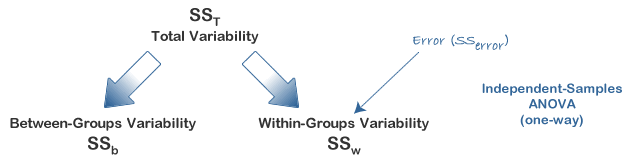

## Q4. How would you calculate the total sum of squares (SST), explained sum of squares (SSE), and residual sum of squares (SSR) in a one-way ANOVA using Python?

We often use three different sum of squares values to measure how well a regression line fits a dataset:

1. **Sum of Squares Total (SST)** – The sum of squared differences between individual data points (yi) and the mean of the response variable (y).

$$SST = \Sigma(y_{i} - \bar{y})^2$$

2. **Sum of Squares Regression (SSR)** – The sum of squared differences between predicted data points (ŷi) and the mean of the response variable(y).

$$SSR = \Sigma(\hat{y_{i}} - \bar{y}) ^ 2$$

3. **Sum of Squares Error (SSE)** – The sum of squared differences between predicted data points (ŷi) and observed data points (yi).

$$SSE = \Sigma(\hat{y_{i}} - y_{i})^2$$

### The following step-by-step example shows how to calculate each of these metrics for a given regression model in Python.

In [2]:
# Create the dataset
hours =  [1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 7, 7, 8]
score = [68, 76, 74, 80, 76, 78, 81, 84, 86, 83, 88, 85, 89, 94, 93, 94, 96, 89, 92, 97]
df = pd.DataFrame({"hour": hours, "score": score})
df.head()

,hour,score
0,1,68
1,1,76
2,1,74
3,2,80
4,2,76


In [3]:
# Fitting a Regression Model

# define response variable
y = df['score']

# define predictor variable
x = df[['hour']]

# add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

### Calculate SST, SSR, and SSE

In [4]:
#calculate SSE
SSE = np.sum((model.fittedvalues - y)**2)
print("SSE =", round(SSE, 4))

# calculate SSR
SSR = np.sum((model.fittedvalues - np.mean(y)) ** 2)
print("SSR =", round(SSR, 4))

# calculate SST
SST = SSR + SSE
print("SST =", round(SST, 4))

SSE = 331.0749
SSR = 917.4751
SST = 1248.55


In [5]:
print("Confidence Interval with alpha = 0.05")
model.conf_int(alpha = 0.05)

Confidence Interval with alpha = 0.05


,0,1
const,69.423316,77.468389
hour,2.284040,4.218264


## Q5. In a two-way ANOVA, how would you calculate the main effects and interaction effects using Python?

**Two Way ANOVA** - In statistics, the two-way analysis of variance is an extension of the one-way ANOVA that examines the influence of two different categorical independent variables on one continuous dependent variable. It is a type of Factorial ANOVA. The main objective of a two-way ANOVA is to find out how two factors affect a response variable and to find out whether there is a relation between the two factors on the response variable.

### Performing a Two-Way ANOVA in Python:
Let us consider an example in which scientists need to know whether plant growth is affected by fertilizers and watering frequency. They planted exactly 30 plants and allowed them to grow for six months under different conditions for fertilizers and watering frequency. After exactly six months, they recorded the heights of each plant centimeters. Performing a Two-Way ANOVA in Python is a step by step process and these are discussed below.

In [6]:
fertilizer = np.repeat(["daily", "weekly"], 15)
watering = np.repeat(["daily", "weekly"], 15)
heights = [14, 16, 15, 15, 16, 13, 12, 11, 14, 15, 16, 16, 17, 18, 14, 13, 14, 14, 14, 15, 16, 16, 17, 18, 14, 13, 14, 14, 14, 15]
df = pd.DataFrame({"Fertilizer": fertilizer, "Watering": watering, "height": heights})
df.head()

,Fertilizer,Watering,height
0,daily,daily,14
1,daily,daily,16
2,daily,daily,15
3,daily,daily,15
4,daily,daily,16


#### Here both Fertilizer and Watering are the 2 differnet categorical independent variables and the dependent or responsible variable is Height

In [18]:
# Performing two-way ANOVA
formula = 'height ~ C(Fertilizer) + C(Watering) + C(Fertilizer):C(Watering)'
model = ols(formula, data=df).fit()
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Fertilizer),1.0,0.033333,0.033333,0.012069,0.913305
C(Watering),1.0,0.092308,0.092308,0.033422,0.856260
C(Fertilizer):C(Watering),1.0,0.057692,0.057692,0.020889,0.886118
Residual,28.0,77.333333,2.761905,NaN,NaN


In [17]:
main_effect = sm.stats.anova_lm(model, type=2)[:2]["sum_sq"]
interaction_effect = sm.stats.anova_lm(model, type=2)[2:3]["sum_sq"]


print("Main Effect")
print("================================")
print(main_effect)
print("================================")

print("\nInteraction Effect")
print("================================")
print(interaction_effect)
print("================================")

Main Effect
C(Fertilizer)    0.033333
C(Watering)      0.092308
Name: sum_sq, dtype: float64

Interaction Effect
C(Fertilizer):C(Watering)    0.057692
Name: sum_sq, dtype: float64


#### Interpreting the result:

Following are the p-values for each of the factors in the output:

1. The **Fertilizer p-value** is equal to **0.913305**  
2. The **Watering p-value** is equal to **0.856260**  
3. The **Fertilizer * Watering: p-value** is equal to **0.886118**

The p-values for water and fertilizer turn out to be greater than 0.05 which implies that the means of both the factors possess no statistically significant effect on plant height. The p-value for the interaction effect (0.904053) is also greater than 0.05 which depicts that there is no significant **interaction effect** between **fertilizer frequency and watering frequency**.

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                   0.01207
Date:                Sat, 22 Jul 2023   Prob (F-statistic):              0.913
Time:                        09:20:00   Log-Likelihood:                -56.772
No. Observations:                  30   AIC:                             117.5
Df Residuals:                      28   BIC:                             120.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        14.8000      0.429     34.491      0.000      13.921      15.679
C(Fertilizer)[T.weekly]                          -0.0222      0.202     -0.110      0.913      -0.437       0.392
C(Watering)[T.weekly]                            -0.0222      0.202     -0.110      0.913      -0.437       0.392
C(Fertilizer)[T.weekly]:C(Watering)[T.weekly]    -0.0222      0.202     -0.110      0.913      -0.437       0.392
==============================================================================
Omnibus:                        0.177   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.011
Skew:                           0.029   Prob(JB):                        0.995
Kurtosis:                       2.929   Cond. No.                     1.33e+32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.65e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Q6. Suppose you conducted a one-way ANOVA and obtained an F-statistic of 5.23 and a p-value of 0.02. What can you conclude about the differences between the groups, and how would you interpret these results?

##### Considering the significance value($\alpha$) as 0.05.

The provided F-statistics value is 5.23 and the p-value is 0.02.

Since the F-value is greater than the significance value, we can reject the NULL Hypothesis. F-statistics helps to understand the variance ratio of between groups and within the groups. Since the value is 5.23, that means that the the variance between the groups is 5.23 times greater then the variance within the groups. But further tests are necessary to conclude which groups have variance significantly different from other groups.

The p-value which is also less than the significance value($\alpha$) value indicates that we should reject the Null Hypothesis and considere that the variance among all the groups of data are not equivalent.

## Q7. In a repeated measures ANOVA, how would you handle missing data, and what are the potential consequences of using different methods to handle missing data?

One of the biggest problems with traditional repeated measures ANOVA is missing data on the response variable. The problem is that repeated measures ANOVA treats each measurement as a separate variable. Because it uses listwise deletion, if one measurement is missing, the entire case gets dropped.

There are many ways to handle this missing data. Some of the feasible methods and their consequences are as follows:

1. **Multiple Imputation(MI)** - One of the most effective ways of dealing with missing data is multiple imputation (MI). Using MI, we can create multiple plausible replacements of the missing data, given what we have observed and a statistical model (the imputation model). In the ANOVA, using MI has the additional benefit that it allows taking covariates into account that are relevant for the missing data but not for the analysis.

2. **Complete Case Analysis (CCA)** - The other option to handle the missing data is to completely remove those data points. But these have considerable consequences as the data which is present might not give the actual represntation of the whole data and thus ANOVA could lead disastrous result in calculating the variance ratio.

3. **Last Observation Carried Forward (LOCF)** - This method involves using the last observed value of a variable as a substitute for any missing values for that variable at later time points. LOCF can produce biased estimates if the assumption that missing values are missing completely at random (**MCAR**) is not met.

4. **Maximum Likelihood (ML)** -  This method involves estimating model parameters using all available data and allowing for missing values. ML can lead to unbiased estimates if data are missing at random (**MAR**), but it requires making assumptions about the distribution of the missing data.

5. **Mean Substitution** - An old procedure that should certainly be relegated to the past was the idea of substituting a mean for the missing data. There are a couple of problems with this approach. In the first place it adds no new information. The overall mean, with or without replacing my missing data, will be the same. In addition, such a process leads to an underestimate of error.


The selection of any of the above methods for replacing the missing data should be based on the reason on why the data is missing. There could be multiple ways the data could be missing like - Missing at Random(MAR), Missing Completely at Random(MCAR) and Missing Not at Random(MNAR).

## Q8. What are some common post-hoc tests used after ANOVA, and when would you use each one? Provide an example of a situation where a post-hoc test might be necessary.

ANOVA statistical test helps us to understand the variance between the groups compared to within the groups. Now this testing of variance boils down to testing of means($\mu$) of the various groups of data. If the p-value from the ANOVA calculated, is less than the significance level($\alpha$), we can reject the Null Hypothesis and conclude that we have sufficient evidence to say that at least one of the means of the groups is different from the others. However, this doesn’t tell us which groups are different from each other. It simply tells us that not all of the group means are equal.

In order to find out exactly which groups are different from each other, we must conduct a post hoc test (also known as a multiple comparison test), which will allow us to explore the difference between multiple group means while also controlling for the family-wise error rate. It’s important to note that we only need to conduct a post hoc test when the p-value for the ANOVA is statistically significant. If the p-value is not statistically significant, this indicates that the means for all of the groups are not different from each other, so there is no need to conduct a post-hoc test to find out which groups are different from each other.

When we perform one hypothesis test, the type I error rate is equal to the significance level, which is commonly chosen to be 0.01, 0.05, or 0.10. However, when we conduct multiple hypothesis tests at once, the probability of getting a false positive increases.

#### Let's walk through a few of these post-hoc tests to be conducted after ANOVA

1. **Tukey’s Test** - It is useful when you want to make every possible pairwise comparison. . It uses the “Honest Significant Difference,” a number that represents the distance between groups, to compare every mean with every other mean.

2. **Holm-Bonferroni Method** - The ordinary Bonferroni method is sometimes viewed as too conservative. Holm’s sequential Bonferroni post hoc test is a less strict correction for multiple comparisons.

3. **Dunnett’s correction** - Like Tukey’s this post hoc test is used to compare means. Unlike Tukey’s, it compares every mean to a control mean.

4. **Duncan’s new multiple range test (MRT)** - When we run Analysis of Variance (ANOVA), the results will tell us if there is a difference in means. However, it won’t pinpoint the pairs of means that are different. Duncan’s Multiple Range Test will identify the pairs of means (from at least three) that differ. The MRT is similar to the LSD(Least Significant Difference), but instead of a t-value, a Q Value is used.

5. **Fisher’s Least Significant Difference (LSD)** - A tool to identify which pairs of means are statistically different. Essentially the same as Duncan’s MRT, but with t-values instead of Q values.

## Q9. A researcher wants to compare the mean weight loss of three diets: A, B, and C. They collect data from 50 participants who were randomly assigned to one of the diets. Conduct a one-way ANOVA using Python to determine if there are any significant differences between the mean weight loss of the three diets. Report the F-statistic and p-value, and interpret the results.

From the problem statement, it can be understood that **Diet** is the factor here and there are 3 levels to it **A**, **B** and **C**. So we need to perform One Way ANOVA for this problem. But the data is missing, so we will generate the data ourselves and do the analysis.

In [15]:
from scipy.stats import f_oneway

# For generating random numbers from the same sequence leading to reproducibility
np.random.seed(42)

diet_A = np.random.randint(low = 5, high = 50, size = 20)
diet_B = np.random.randint(low = 10, high = 30, size = 20)
diet_C = np.random.randint(low = 15, high = 65, size = 20)

null_hypo = "The mean of all the groups are equal"
alt_hypo = "Atleast one of the mean of the group is different"

# Defining the significance value
alpha = 0.05

model = f_oneway(diet_A, diet_B, diet_C)

p_val = model.pvalue
f_stat = model.statistic

if f_stat > alpha:
    print("Reject the Null Hypothesis")
    print("Conclusion:", alt_hypo)
else:
    print("Failed to Reject the Null Hypothesis")
    print("Conclusion:", null_hypo)

Reject the Null Hypothesis
Conclusion: Atleast one of the mean of the group is different


#### Performing Tukey's post-hoc test for mean difference since the p-value is less than the significance value

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.DataFrame({"weight_loss": list(diet_A) + list(diet_B) + list(diet_C),
                  "group": np.repeat(["A", "B", "C"], repeats= 20)})

tukey = pairwise_tukeyhsd(endog=df["weight_loss"], groups =df["group"], alpha = 0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -7.6 0.1488 -17.2409  2.0409  False
     A      C     12.3  0.009   2.6591 21.9409   True
     B      C     19.9    0.0  10.2591 29.5409   True
-----------------------------------------------------


#### Conclusion: We could conclude from the p-values obtained above that the mean difference between groups (A and C) and (B and C) are statistically significant but the p-value between group A and B is not not statistically significant.

## Q10. A company wants to know if there are any significant differences in the average time it takes to complete a task using three different software programs: Program A, Program B, and Program C. They randomly assign 30 employees to one of the programs and record the time it takes each employee to complete the task. Conduct a two-way ANOVA using Python to determine if there are any main effects or interaction effects between the software programs and employee experience level (novice vs. experienced). Report the F-statistics and p-values, and interpret the results.

In [42]:
np.random.seed(42)

# Time required by novice and expert
time_novice = np.random.normal(loc = 10, scale = 2, size = 45)
time_expert = np.random.normal(loc = 5, scale = 1, size = 45)

df = pd.DataFrame({"Software": np.repeat(["A", "B", "C"], repeats= 30),
                   "Experience": np.repeat(["Novice", "Expert"], repeats=45),
                  "Time": list(time_novice) + list(time_expert)})


# Creating the formula for the Ordinay Least Square Model
formula = "Time ~ C(Software) + C(Experience) + C(Software):C(Experience)"
model = ols(formula= formula, data=df).fit()
table = sm.stats.anova_lm(model, type = 2)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Software),2.0,319.009648,159.504824,72.005583,4.248443e-19
C(Experience),1.0,146.856266,146.856266,66.295619,2.727203e-12
C(Software):C(Experience),2.0,1.995194,0.997597,0.450347,6.389013e-01
Residual,86.0,190.504878,2.215173,NaN,NaN


In [54]:
# Considering the significance value as 0.05
alpha = 0.05

print("==========================================")
print("The Main and Interaction Effect Conclusion")
print("==========================================")


if table["PR(>F)"][0] > alpha:
    print("The Software group has a significant main effect on the mean")
else:
    print("The Software group has no significant main effect on the mean")
    
if table["PR(>F)"][1] > alpha:
    print("The Experience group has a significant main effect on the mean")
else:
    print("The Experience group has no significant main effect on the mean")
    
if table["PR(>F)"][2] > alpha:
    print("The Software and Experience group has a significant interaction effect on the mean")
else:
    print("The Software and Experience group has no significant interaction effect on the mean")

The Main and Interaction Effect Conclusion
The Software group has no significant main effect on the mean
The Experience group has no significant main effect on the mean
The Software and Experience group has a significant interaction effect on the mean


## Q11. An educational researcher is interested in whether a new teaching method improves student test scores. They randomly assign 100 students to either the control group (traditional teaching method) or the experimental group (new teaching method) and administer a test at the end of the semester. Conduct a two-sample t-test using Python to determine if there are any significant differences in test scores between the two groups. If the results are significant, follow up with a post-hoc test to determine which group(s) differ significantly from each other.

In [59]:
np.random.seed(57)

score_control_group = np.random.normal(loc = 15, scale = 5, size = 40)
score_experimental_group = np.random.normal(loc =40, scale = 15, size = 60)

t_stat, p_val = stats.ttest_ind(a = score_control_group, b = score_experimental_group)

null_hypo = "There is no significant difference between control group and experimental group"
alt_hypo = "There is significant difference between control group and experimental group"

alpha = 0.05

if p_val < alpha:
    print("Reject the Null Hypothesis")
    print("Conclusion:", alt_hypo)
else:
    print("Fail to reject the Null Hypothesis")
    print("Conclusion:", null_hypo)

Reject the Null Hypothesis
Conclusion: There is significant difference between control group and experimental group


#### Tukey's Test for post-hoc

In [62]:
df = pd.DataFrame({"Group": np.repeat(["control", "experimental"], repeats= 50),
                  "Scores": list(score_control_group) + list(score_experimental_group)})
tukey = pairwise_tukeyhsd(endog=df["Scores"], groups =df["Group"], alpha = 0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------
control experimental  21.9017   0.0 16.1378 27.6656   True
----------------------------------------------------------


#### Conclusion:

Reject = True indicates we need to reject the Null Hypothesis and that there is signifacnt difference between control and experimental group

## Q12. A researcher wants to know if there are any significant differences in the average daily sales of three retail stores: Store A, Store B, and Store C. They randomly select 30 days and record the sales for each store on those days. Conduct a repeated measures ANOVA using Python to determine if there are any significant differences in sales between the three stores. If the results are significant, follow up with a posthoc test to determine which store(s) differ significantly from each other.

There are 2 factors here - Retail stores and Days  
Retail Stores has 3 levels - Store A, Store B, and Store C  
Days has different levels - like 30 days

In [71]:
np.random.seed(67)

sales_storeA = np.random.randint(low = 0, high = 100, size = 30)
sales_storeB = np.random.randint(low = 0, high = 100, size = 30)
sales_storeC = np.random.randint(low = 0, high = 100, size = 30)

df = pd.DataFrame({"Store": np.repeat(["A", "B", "C"], repeats= 30),
                   "Day": np.tile(A = np.arange(0, 30), reps= 3),
                   "Sales": list(sales_storeA) + list(sales_storeB) + list(sales_storeC)})
df.head()

,Store,Day,Sales
0,A,0,67
1,A,1,53
2,A,2,74
3,A,3,69
4,A,4,7


In [76]:
from statsmodels.stats.anova import AnovaRM

# Perform the repeated measures ANOVA
model = AnovaRM(data=df, depvar='Sales', subject='Store', within=['Day']).fit()
print(model)

              Anova
    F Value  Num DF  Den DF Pr > F
----------------------------------
Day  0.9714 29.0000 58.0000 0.5214



In [90]:
# Declaring significance value as 0.05
alpha = 00.05

null_hypo = "There is no significant difference between sales of the 3 stores"
alt_hypo = "There is significant difference between sales of the 3 stores"

summary = model.anova_table
p_val = summary['Pr > F'][0]
print("p_value = ", p_val)

if p_val < alpha:
    print("Reject the Null Hypothesis")
    print("Conclusion:", alt_hypo)
else:
    print("Fail to reject the Null Hypothesis")
    print("Conclusion:", null_hypo)

p_value =  0.5213567951550212
Fail to reject the Null Hypothesis
Conclusion: There is no significant difference between sales of the 3 stores


#### Since the p_value is not significant, hence we accept the Null Hypothesis that the mean of the sales of the 3 different stores over a period of 30 days is almost same. Hence we need not perform post-hoc test to determine which groups differ as well as their interaction effect.